In [1]:
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    CheckSource,
    co60,
    cs137,
    mn54,
    na22,
)
from libra_toolbox.neutron_detection.activation_foils.compass import (
    Measurement,
    CheckSourceMeasurement,
)
from libra_toolbox.neutron_detection.activation_foils import compass
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

run_dir = "../../data/neutron_detection/250317_BABY_1L_run3/DAQ"
uCi_to_Bq = 3.7e4

co60_checksource = CheckSource(
    co60, activity_date=date(2014, 3, 19), activity=0.872 * uCi_to_Bq
)
cs137_checksource = CheckSource(
    cs137, activity_date=date(2023, 9, 29), activity=9.38 * uCi_to_Bq
)
mn54_checksource = CheckSource(
    mn54, activity_date=date(2016, 5, 2), activity=6.27 * uCi_to_Bq
)
na22_checksource = CheckSource(
    na22, activity_date=date(2023, 9, 29), activity=9.98 * uCi_to_Bq
)

check_source_measurements = {
    "Co60_1": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250318_run2/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_2": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250319_run3/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_3": {
        "directory": f"{run_dir}/Co60_0_872uCi_19Mar2014_250320_run4/UNFILTERED",
        "check_source": co60_checksource,
    },
    "Co60_4": {
        "directory": f"{run_dir}/Co60_1_0uCi_Jan2006_250318/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 1, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Co60_5": {
        "directory": f"{run_dir}/Co60_1_0uCi_Feb2006_250320_run1/UNFILTERED",
        "check_source": CheckSource(
            co60, activity_date=date(2006, 2, 1), activity=1.0 * uCi_to_Bq
        ),
    },
    "Cs137_1": {
        "directory": f"{run_dir}/Cs137_4_66uCi_19Mar2014_250318/UNFILTERED",
        "check_source": CheckSource(
            cs137, activity_date=date(2014, 3, 19), activity=4.66 * uCi_to_Bq
        ),
    },
    "Cs137_2": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run2/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_3": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Cs137_4": {
        "directory": f"{run_dir}/Cs137_9_38uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": cs137_checksource,
    },
    "Mn54_1": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250318/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_2": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250319_run2/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Mn54_3": {
        "directory": f"{run_dir}/Mn54_6_27uCi_2May2016_250320_run3/UNFILTERED",
        "check_source": mn54_checksource,
    },
    "Na22_2": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run3/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_3": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run4/UNFILTERED",
        "check_source": na22_checksource,
    },
    "Na22_4": {
        "directory": f"{run_dir}/Na22_9_98uCi_29Sep2023_250319_run5/UNFILTERED",
        "check_source": na22_checksource,
    },
}

background_dir = f"{run_dir}/Background_250322/UNFILTERED"

In [2]:
all_measurements = {}

for name, values in check_source_measurements.items():
    print(f"Processing {name}...")
    meas = CheckSourceMeasurement.from_directory(values["directory"], name=name)
    meas.check_source = values["check_source"]
    print(meas)
    all_measurements[name] = meas

print(f"Processing background...")
background_meas = Measurement.from_directory(
    background_dir,
    name="Background",
    info_file_optional=True,
)

Processing Co60_1...
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Co60_5...
Processing Cs137_1...
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_2...
Processing Na22_3...
Processing Na22_4...
Processing background...


/home/remidm/anaconda3/envs/baby-1l-run-3/lib/python3.12/site-packages/libra_toolbox/neutron_detection/activation_foils/compass.py:178: UserWarning: run.info file not found. Assuming start and stop time are not needed.
  warnings.warn(


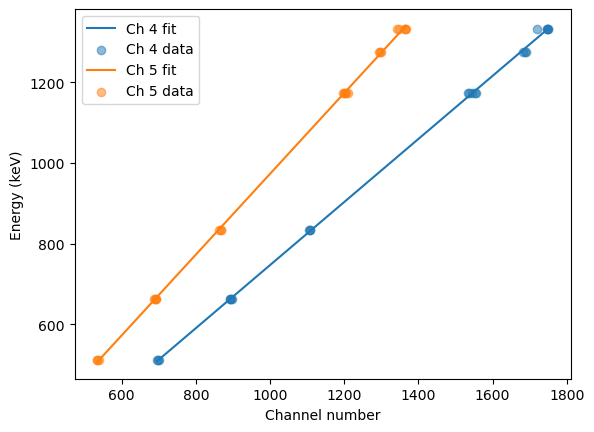

In [3]:
calibration_coeffs = {}

for channel_nb in [4, 5]:
    calibration_channels, calibration_energies = compass.get_calibration_data(
        all_measurements.values(),
        background_measurement=background_meas,
        channel_nb=channel_nb,
    )

    coeff = np.polyfit(calibration_channels, calibration_energies, 1)
    calibration_coeffs[channel_nb] = coeff

    xs = np.linspace(
        calibration_channels[0],
        calibration_channels[-1],
    )
    plt.plot(
        xs,
        np.polyval(coeff, xs),
        label=f"Ch {channel_nb} fit",
    )
    plt.scatter(
        calibration_channels,
        calibration_energies,
        label=f"Ch {channel_nb} data",
        alpha=0.5,
    )
plt.xlabel("Channel number")
plt.ylabel("Energy (keV)")
plt.legend()
plt.show()

In [4]:
# fit efficiency curve with polynomial
from typing import List


def efficiency_curve(channel_nb: int, measurements: List[CheckSourceMeasurement]):
    efficiencies = []
    energies = []
    for measurement in measurements:
        efficiency = measurement.compute_detection_efficiency(
            background_measurement=background_meas,
            calibration_coeffs=calibration_coeffs[channel_nb],
            channel_nb=channel_nb,
            search_width=250,
        )
        efficiencies.append(efficiency)
        energies.append(measurement.check_source.nuclide.energy)

    # flatten the lists
    energies = [energy for sublist in energies for energy in sublist]
    efficiencies = [efficiency for sublist in efficiencies for efficiency in sublist]
    return energies, efficiencies

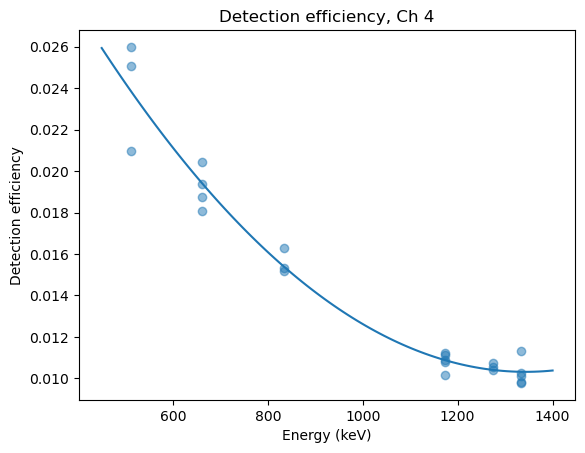

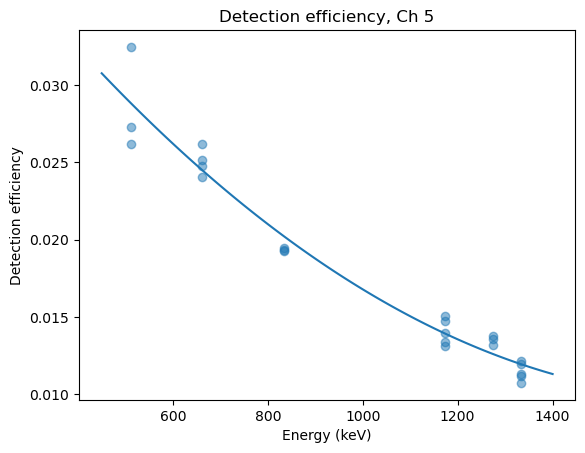

In [5]:
detection_efficiency_coeffs = {}
for ch_nb in [4, 5]:
    energies, efficiencies = efficiency_curve(ch_nb, list(all_measurements.values()))

    detection_efficiency_coeffs[ch_nb] = np.polyfit(energies, efficiencies, 2)

    plt.figure()
    plt.title(f"Detection efficiency, Ch {ch_nb}")
    plt.scatter(energies, efficiencies, label="Data", alpha=0.5)
    xs = np.linspace(450, 1400, 100)
    plt.plot(xs, np.polyval(detection_efficiency_coeffs[ch_nb], xs), label="Fit")
    plt.xlabel("Energy (keV)")
    plt.ylabel("Detection efficiency")
    plt.show()

In [6]:
import json

with open("../../data/general.json", "r") as f:
    general_data = json.load(f)

In [7]:
from libra_toolbox.neutron_detection.activation_foils.compass import SampleMeasurement
from libra_toolbox.neutron_detection.activation_foils.calibration import (
    nb93,
    nb92m,
    ActivationFoil,
    Reaction,
)


# Cross section from EAF-2010 at 14 MeV
Nb93_n_2n_Nb92m_cross_section_at_14Mev = 0.4729  # barn
barn_to_cm2 = 1e-24
Nb93_n_2n_Nb92m_cross_section_at_14Mev *= barn_to_cm2  # cm^2

nb_reaction = Reaction(
    reactant=nb93, product=nb92m, cross_section=Nb93_n_2n_Nb92m_cross_section_at_14Mev
)
nb_foil_data = general_data["neutron_detection"]["foils"]["materials"][1]
nb_foil = ActivationFoil(
    reaction=nb_reaction,
    mass=nb_foil_data["mass"]["value"],  # in grams
    name="Nb foil",
)
assert nb_foil_data["material"] == "Nb"

sample_measurements_directories = {
    "niobium_1": f"{run_dir}/Niobium_250318_1253_count1/UNFILTERED",
    "niobium_2": f"{run_dir}/Niobium_250319_1124_count2/UNFILTERED",
    "niobium_3": f"{run_dir}/Niobium_250321_0935_count3/UNFILTERED",
    # "zirconium_1": f"{run_dir}/Zirconium_1L_3_240317_2312/UNFILTERED",
    # "zirconium_2": f"{run_dir}/Zirconium_250318_2219_count2/UNFILTERED",
    # "zirconium_3": f"{run_dir}/Zirconium_250320_1042_count3/UNFILTERED",
}

all_sample_measurements = {}

for sample, directory in sample_measurements_directories.items():
    print(f"Processing {sample}...")
    meas = SampleMeasurement.from_directory(directory, name=sample)
    print(meas)
    all_sample_measurements[sample] = meas
    if "niobium" in sample:
        meas.foil = nb_foil

Processing niobium_1...
Processing niobium_2...
Processing niobium_3...


In [8]:
from datetime import datetime

irradiations = general_data["generators"][0]["periods"].copy()
# read start time from general.json
all_start_times = []
for generator in general_data["generators"]:
    if generator["enabled"] is False:
        continue
    for irradiation_period in generator["periods"]:
        start_time = datetime.strptime(irradiation_period["start"], "%m/%d/%Y %H:%M")
        all_start_times.append(start_time)
start_time = min(all_start_times)

for irr in irradiations:
    irr["t_on"] = (
        datetime.strptime(irr["start"], "%m/%d/%Y %H:%M") - start_time
    ).total_seconds()
    irr["t_off"] = (
        datetime.strptime(irr["end"], "%m/%d/%Y %H:%M") - start_time
    ).total_seconds()


time_generator_off = datetime.strptime("3/17/2025 22:10", "%m/%d/%Y %H:%M")
irradiations

[{'start': '3/17/2025 10:03',
  'end': '3/17/2025 19:26',
  't_on': 0.0,
  't_off': 33780.0},
 {'start': '3/17/2025 19:33',
  'end': '3/17/2025 22:10',
  't_on': 34200.0,
  't_off': 43620.0}]

In [9]:
for ch_nb in [4, 5]:
    print(f"Processing channel {ch_nb}...")
    for sample, measurement in all_sample_measurements.items():
        emmited_gammas, err = measurement.get_gamma_emitted(
            background_measurement=background_meas,
            efficiency_coeffs=detection_efficiency_coeffs[ch_nb],
            calibration_coeffs=calibration_coeffs[ch_nb],
            channel_nb=ch_nb,
            search_width=300,
        )
        # add timezone
        time_generator_off = time_generator_off.replace(
            tzinfo=measurement.start_time.tzinfo
        )

        print(f"{sample}: {emmited_gammas} ± {err} emmited gamma rays")
        neutron_flux = measurement.get_neutron_rate(
            photon_counts=emmited_gammas,  # NOTE should account for intensity
            irradiations=irradiations,
            distance=5.08,  # cm
            time_generator_off=time_generator_off,
            channel_nb=ch_nb,
        )
        print(f"{sample}: {neutron_flux[0]:.2e} neutrons/s")

Processing channel 4...
niobium_1: [453565.55868167] ± [5777.85694141] emmited gamma rays
niobium_1: 1.01e+08 neutrons/s
niobium_2: [1147332.03146985] ± [9189.48787892] emmited gamma rays
niobium_2: 1.07e+08 neutrons/s
niobium_3: [898352.09567175] ± [8131.48832238] emmited gamma rays
niobium_3: 8.61e+07 neutrons/s
Processing channel 5...
niobium_1: [455067.89868838] ± [5019.73844962] emmited gamma rays
niobium_1: 8.82e+07 neutrons/s
niobium_2: [1058187.66781715] ± [7654.63235414] emmited gamma rays
niobium_2: 8.95e+07 neutrons/s
niobium_3: [1055551.78021472] ± [7645.09277453] emmited gamma rays
niobium_3: 9.41e+07 neutrons/s
